In [1]:
import keras
from keras.datasets import mnist

/home/ubuntu/anaconda/envs/py36-venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load MNIST data from Keras
Images are ecoded as Numpy arrays

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Training Dataset Shape: {}".format(train_images.shape))

Training Dataset Shape: (60000, 28, 28)


## First 4 samples in Test dataset

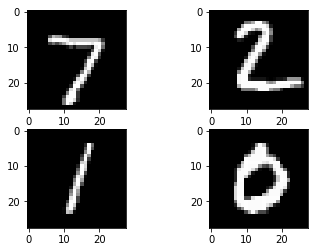

In [4]:
import matplotlib.pyplot as plt
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(test_images[0], cmap='gray')
plt.subplot(222)
plt.imshow(test_images[1], cmap='gray')
plt.subplot(223)
plt.imshow(test_images[2], cmap='gray')
plt.subplot(224)
plt.imshow(test_images[3], cmap='gray')
# show the plot
plt.show()

# Data Preprocessing

## 1. Normalize/Scale data

The pixel values are gray scale between 0 and 255. Normalize it to [0, 1] range by dividing 255.

In [4]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_images = train_images.astype('float32')/255

val_images = train_images[:5000]
train_images = train_images[5000:]

test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
test_images = test_images.astype('float32')/255

## 2. One-hot-encoding on Labels
It is good practice to use a one-hot-encoding of the class values, transforming the vector of class integers into a binary matrix.

In [5]:
from keras.utils import to_categorical

print("The First 10 Training Labels:\n {}".format(test_labels[:10]))

train_labels = to_categorical(train_labels)

# Split Validataion set from training set
val_labels = train_labels[:5000]
train_labels = train_labels[5000:]

test_labels = to_categorical(test_labels)

print("After encoding:\n {}".format(test_labels[:10]))

The First 10 Training Labels:
 [7 2 1 0 4 1 4 9 5 9]
After encoding:
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Build a Convolutional Neural Network

In [6]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense, Activation, Dropout

In [7]:
model = Sequential()

model.add(Conv2D(filters=20, 
              kernel_size=(5, 5), 
              strides=(1, 1), 
              padding="same", 
              activation='relu', 
              input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=50, 
              kernel_size=(5, 5), 
              strides=(1, 1), 
              padding="same", 
              activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.5))

In [8]:
print(model.output_shape)

(None, 7, 7, 50)


## Below two Fully-connected layers are inherited from last lesson.

In [9]:
model.add(Flatten())
model.add(Dense(units=500, activation='relu'))

The output layer consists of 10 neurons since we want to classify digits into 10 classes (0 to 9)

In [10]:
model.add(Dense(units=10, activation='softmax'))

In [11]:
from keras import optimizers

model.compile(optimizer=optimizers.Adam(lr=0.001),
           loss='categorical_crossentropy',
           metrics=['accuracy']
          )

## Start Neural Network Training

In [12]:
history = model.fit(
    train_images, 
    train_labels,
    epochs=20,
    batch_size=128,
    validation_data=(val_images, val_labels),
    verbose=1
    )

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 14s 254us/step - loss: 0.1956 - acc: 0.9381 - val_loss: 0.0671 - val_acc: 0.9802
Epoch 2/20
55000/55000 [==============================] - 7s 119us/step - loss: 0.0624 - acc: 0.9806 - val_loss: 0.0402 - val_acc: 0.9872
Epoch 3/20
55000/55000 [==============================] - 6s 118us/step - loss: 0.0463 - acc: 0.9848 - val_loss: 0.0329 - val_acc: 0.9894
Epoch 4/20
55000/55000 [==============================] - 6s 118us/step - loss: 0.0392 - acc: 0.9874 - val_loss: 0.0309 - val_acc: 0.9912
Epoch 5/20
55000/55000 [==============================] - 7s 118us/step - loss: 0.0315 - acc: 0.9899 - val_loss: 0.0266 - val_acc: 0.9916
Epoch 6/20
55000/55000 [==============================] - 7s 118us/step - loss: 0.0280 - acc: 0.9909 - val_loss: 0.0265 - val_acc: 0.9904
Epoch 7/20
55000/55000 [==============================] - 6s 118us/step - loss: 0.0252 - acc: 0.9919 - val_loss: 0.0269 - 

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1225500   
__________

## Convoluation Filters

In [14]:
weights = model.get_weights() # get model weights
conv1_filters = weights[0]
print("The first conv layer's filers: {}\n".format(conv1_filters.shape))
conv1_filters[:,:,:,0] # the first filter 

The first conv layer's filers: (5, 5, 1, 20)



array([[[-0.03877818],
        [ 0.06255184],
        [-0.00810223],
        [ 0.04865535],
        [ 0.04208807]],

       [[-0.04631386],
        [-0.12889503],
        [-0.19409879],
        [ 0.06850196],
        [ 0.04419895]],

       [[-0.10139079],
        [-0.09862718],
        [-0.08556543],
        [ 0.04911518],
        [ 0.12189538]],

       [[-0.09595104],
        [ 0.00836138],
        [-0.01649703],
        [ 0.0076978 ],
        [ 0.04409373]],

       [[-0.0501192 ],
        [-0.06715069],
        [-0.07589749],
        [ 0.03763331],
        [ 0.09503209]]], dtype=float32)

## Evaluation and Test

In [15]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 79us/step


[0.024005420563348662, 0.994]

In [16]:
preds = model.predict_classes(test_images[:4])
probs = model.predict_proba(test_images[:4])

print("Predicted Classes: {}".format(preds))
print("Predicted Probabilities:\n {}".format(probs))

Predicted Classes: [7 2 1 0]
Predicted Probabilities:
 [[1.8886373e-17 1.1537581e-11 3.1729404e-16 4.2723203e-13 5.8673265e-20
  5.0839059e-22 1.4633467e-22 1.0000000e+00 7.4613296e-18 1.6239075e-10]
 [1.1488497e-12 3.0094135e-12 1.0000000e+00 1.2486017e-20 5.5431391e-18
  4.6195291e-22 6.7048114e-13 1.5278615e-17 1.3197904e-16 1.1527758e-17]
 [1.6197598e-13 1.0000000e+00 4.4199921e-14 8.1271038e-20 5.4861666e-09
  8.6892117e-12 1.1717858e-12 1.6340738e-10 8.8632694e-14 2.1901841e-14]
 [9.9999988e-01 2.4672265e-16 5.4168558e-12 3.0746096e-12 4.7734315e-13
  7.1052708e-10 7.9533919e-08 1.3304240e-11 4.2940345e-13 3.5151576e-10]]


## Loss and Accuracy Diagrams

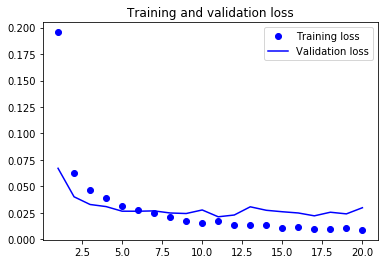

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

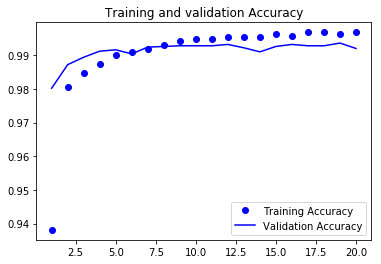

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()

plt.show()